In [1]:
import pandas as pd 
import numpy as np

In [2]:
cardio=pd.read_csv("cardio_train.csv", sep=';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
cardio.shape

(69301, 13)

In [4]:
cardio.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
cardio['age']= (cardio['age']/365.25)
cardio['age']=cardio['age'].astype(int)
cardio['age'].head()

0    61
1    40
2    59
3    39
4    64
Name: age, dtype: int32

In [6]:
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,52.803264,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.762401,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
cardio = cardio.drop(['id'], axis=1)

In [9]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,59,1,165,70.0,120,80,1,1,0,0,1,0
3,39,2,165,85.0,120,80,1,1,1,1,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0


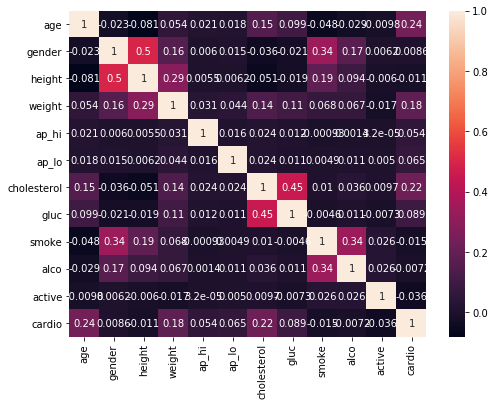

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(8,6))
sns.heatmap(cardio.corr(),annot=True, linewidths=.0000000001)

In [11]:
#sns.pairplot(cardio)

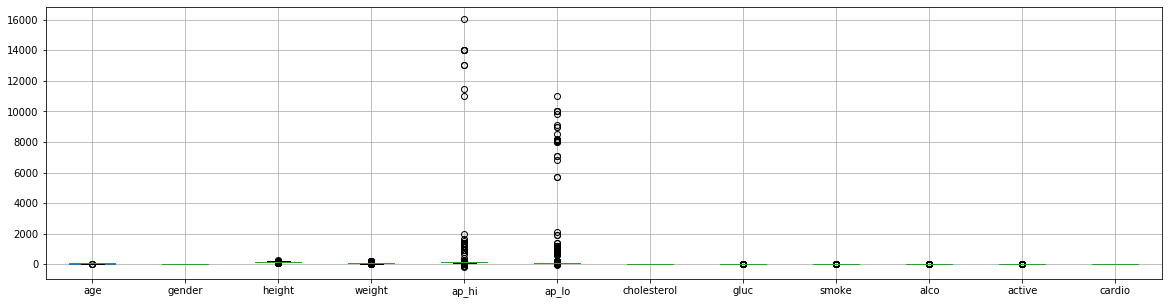

In [12]:
cardio.boxplot(figsize=(20,5))

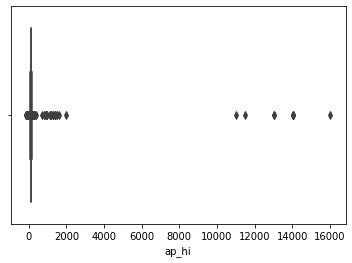

In [13]:
sns.boxplot(cardio['ap_hi'])

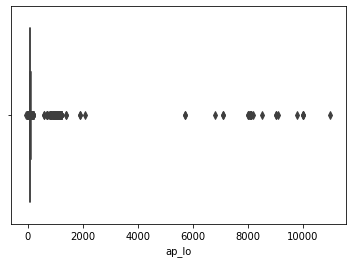

In [14]:
sns.boxplot(data=cardio,x=cardio.ap_lo)

In [15]:
def remove_outlier(dataset_name, col_name, thres=1.5):
    q1 = dataset_name[col_name].quantile(0.25)
    q3 = dataset_name[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-thres*iqr
    fence_high = q3+thres*iqr
    mask = (dataset_name[col_name] > fence_high) | (dataset_name[col_name] < fence_low)
    dataset_name.loc[mask, col_name] = np.nan
    return dataset_name

In [16]:
remove_outlier(cardio,'ap_hi')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130.0,80,2,2,0,0,1,0
1,40,1,163,71.0,110.0,70,1,1,0,0,1,1
2,59,1,165,70.0,120.0,80,1,1,0,0,1,0
3,39,2,165,85.0,120.0,80,1,1,1,1,1,0
4,64,1,155,62.0,120.0,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52,2,168,76.0,120.0,80,1,1,1,0,1,0
69297,61,1,158,126.0,140.0,90,2,2,0,0,1,1
69298,52,2,183,105.0,NaN,90,3,1,0,1,0,1
69299,61,1,163,72.0,135.0,80,1,2,0,0,0,1


In [17]:
remove_outlier(cardio,'ap_lo')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130.0,80.0,2,2,0,0,1,0
1,40,1,163,71.0,110.0,70.0,1,1,0,0,1,1
2,59,1,165,70.0,120.0,80.0,1,1,0,0,1,0
3,39,2,165,85.0,120.0,80.0,1,1,1,1,1,0
4,64,1,155,62.0,120.0,80.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52,2,168,76.0,120.0,80.0,1,1,1,0,1,0
69297,61,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69298,52,2,183,105.0,NaN,90.0,3,1,0,1,0,1
69299,61,1,163,72.0,135.0,80.0,1,2,0,0,0,1


In [18]:
cardio.shape

(69301, 12)

In [19]:
cardio.isnull().sum()

age               0
gender            0
height            0
weight            0
ap_hi          1419
ap_lo          4584
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [20]:
cardio['ap_hi']=cardio['ap_hi'].fillna(cardio['ap_hi'].mean())
cardio['ap_lo']=cardio['ap_lo'].fillna(cardio['ap_lo'].mean())

In [21]:
cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [22]:
x=cardio.iloc[:,:-1]
x


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61,1,155,69.0,130.000000,80.0,2,2,0,0,1
1,40,1,163,71.0,110.000000,70.0,1,1,0,0,1
2,59,1,165,70.0,120.000000,80.0,1,1,0,0,1
3,39,2,165,85.0,120.000000,80.0,1,1,1,1,1
4,64,1,155,62.0,120.000000,80.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69296,52,2,168,76.0,120.000000,80.0,1,1,1,0,1
69297,61,1,158,126.0,140.000000,90.0,2,2,0,0,1
69298,52,2,183,105.0,126.172564,90.0,3,1,0,1,0
69299,61,1,163,72.0,135.000000,80.0,1,2,0,0,0


In [23]:
y=cardio.iloc[:,-1]
y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.36,random_state=34)

In [25]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
29391,64,1,161,84.0,140.0,90.000000,3,1,0,0,1
30021,63,1,155,80.0,110.0,70.000000,2,1,0,0,1
53219,59,2,162,62.0,100.0,81.928226,3,1,0,0,0
58530,57,2,166,65.0,120.0,70.000000,1,1,0,0,1
34420,42,2,182,72.0,120.0,80.000000,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
22981,55,2,180,103.0,120.0,80.000000,3,1,0,0,1
38435,49,1,161,72.0,120.0,80.000000,2,1,0,0,1
68693,56,1,163,63.0,120.0,80.000000,1,1,0,0,0
22377,58,1,164,69.0,120.0,80.000000,3,3,0,0,1


In [26]:
y_train

29391    1
30021    0
53219    1
58530    0
34420    0
        ..
22981    1
38435    0
68693    0
22377    0
43498    1
Name: cardio, Length: 44352, dtype: int64

In [27]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
9969,53,1,170,65.0,110.000000,70.000000,1,1,0,0,0
13046,59,1,145,83.0,126.172564,100.000000,1,1,0,0,1
19303,58,2,169,70.0,110.000000,70.000000,1,1,0,0,0
57375,56,1,170,65.0,130.000000,80.000000,3,3,0,0,0
57745,59,1,148,73.0,125.000000,75.000000,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2582,59,1,165,60.0,120.000000,80.000000,1,1,0,0,0
4719,41,1,164,78.0,100.000000,80.000000,1,2,0,0,1
2405,41,2,169,59.0,120.000000,80.000000,1,1,0,0,1
28418,49,1,156,89.0,130.000000,80.000000,2,1,0,0,1


In [28]:
y_test

9969     0
13046    1
19303    0
57375    0
57745    0
        ..
2582     0
4719     0
2405     0
28418    0
63893    1
Name: cardio, Length: 24949, dtype: int64

In [29]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

NameError: name 'sc' is not defined

In [ ]:
#print(x_train)

In [ ]:
#print(x_test)

In [30]:
import sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [31]:
model=[LDA(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),LinearSVC(),GaussianNB()]

for m in model:
    print("Model :",m ,"\n")
    
    m.fit(x_train,y_train)
    print("Model Score :",m.score(x_train,y_train) ,"\n")  
    
    predm=np.array(m.predict(x_test))
    print("Model Pediction :",predm  ,"\n")
    
    print("Confusion Matrix :","\n", confusion_matrix(y_test,predm)  ,"\n")
    
    print("Accuracy Score : ", accuracy_score(y_test,predm)  ,"\n")
    
    print("Classification Report : ", classification_report(y_test,predm) ,"\r\r\n\n\n")
    
    



Model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

Model Score : 0.7253336940836941 

Model Pediction : [0 1 0 ... 0 1 1] 

Confusion Matrix : 
 [[9834 2711]
 [4122 8282]] 

Accuracy Score :  0.7261212874263497 

Classification Report :                precision    recall  f1-score   support

           0       0.70      0.78      0.74     12545
           1       0.75      0.67      0.71     12404

    accuracy                           0.73     24949
   macro avg       0.73      0.73      0.73     24949
weighted avg       0.73      0.73      0.73     24949
 



Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm

In [32]:
dtc=RandomForestClassifier()
dtc.fit(x_train,y_train)
pridm=dtc.predict(x_test)
print(pridm)

[0 1 0 ... 0 1 1]


In [33]:
from sklearn.externals import joblib
joblib.dump(dtc,'cardio_report.pkl')

['cardio_report.pkl']